In [5]:
############################ Importing necessaire modules

import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import ne_chunk
import os



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukasfrickelgooglemail.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lukasfrickelgooglemail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
path_data = pd.read_csv('/Users/lukasfrickelgooglemail.com/Desktop/Techlabs/Input/test.csv')

In [29]:
path_train = pd.read_csv('/Users/lukasfrickelgooglemail.com/Desktop/Techlabs/Input/train.csv')

In [30]:
df = path_train

In [31]:
df['title'] = df['title'].fillna('None')
df['author'] = df['author'].fillna('None')
df = df[df['text'].notna()]
df.reset_index(drop=True, inplace=True)

In [32]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [33]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [34]:
df.keys()

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [35]:
df.sort_index()
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20756,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20757,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20758,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20759,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [36]:
df.iloc[[1]]

,id,title,author,text,label
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [37]:
df.title.count()

20761

In [38]:
df.author.value_counts()

None                                         1918
Pam Key                                       243
admin                                         193
Jerome Hudson                                 166
Charlie Spiering                              141
                                             ... 
Jeremy R. Hammond                               1
Vic Bishop                                      1
Douglas Martin                                  1
Najim Rahim and Fahim Abed                      1
Michael J. de la Merced and Rachel Abrams       1
Name: author, Length: 4202, dtype: int64

In [39]:
df.text.value_counts()

In [40]:

#import re
#import string

#Round1 cleaning title

#def clean_text_round1(title):
    
 #   title = re.sub('\[.*?\]', '', title)
  #  title = re.sub("[^-9A-Za-z ]", "" , title)
   # title = re.sub('[%s]' % re.escape(string.punctuation), '', title) 
    #title = re.sub('\w*\d\w*', '', title) 
    #return title

#round1 = lambda x: clean_text_round1(x)

In [41]:
import re
import string

#Cleaning title

def clean_title_round1(title):
    
     title = re.sub(r"\W", " ", title)                                # replacing every non-word character with a white space
     title = re.sub(r"\d", " ", title)                                # replacing every digit character with a white space
     title = re.sub(r"\s+", " ", title)                               # replacing every one or more. white space with a single white space
     title = re.sub(r"\s+[a-z]\s+", " ", title, flags = re.I)         # replacing alphabetic characters which have one or more white space before and after them with a white space
     title = re.sub(r"^\s+", "", title)                               # substituting one or more white space which is at beginning of the string with an empty string
     title = re.sub(r"\s+$", "", title)                               # substituting one or more white space which is at end of the string with an empty string
     return title

round1 = lambda x: clean_title_round1(x)

In [42]:
df.title = pd.DataFrame(df.title.apply(round1))

/Users/lukasfrickelgooglemail.com/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
#Cleaning author

def clean_text_round1(text):
    
     text = re.sub(r"\W", " ", text)                                # replacing every non-word character with a white space
     text = re.sub(r"\d", " ", text)                                # replacing every digit character with a white space
     text = re.sub(r"\s+", " ", text)                               # replacing every one or more. white space with a single white space
     text = re.sub(r"\s+[a-z]\s+", " ", text, flags = re.I)         # replacing alphabetic characters which have one or more white space before and after them with a white space
     text = re.sub(r"^\s+", "", text)                               # substituting one or more white space which is at beginning of the string with an empty string
     text = re.sub(r"\s+$", "", text)                               # substituting one or more white space which is at end of the string with an empty string
     return text

round1 = lambda x: clean_text_round1(x)

In [44]:
df.text = pd.DataFrame(df.text.apply(round1))

In [45]:
#Cleaning author

def clean_author_round1(author):
    
     author = re.sub(r"\W", " ", author)                                # replacing every non-word character with a white space
     author = re.sub(r"\d", " ", author)                                # replacing every digit character with a white space
     author = re.sub(r"\s+", " ", author)                               # replacing every one or more. white space with a single white space
     author = re.sub(r"\s+[a-z]\s+", " ", author, flags = re.I)         # replacing alphabetic characters which have one or more white space before and after them with a white space
     author = re.sub(r"^\s+", "", author)                               # substituting one or more white space which is at beginning of the string with an empty string
     author = re.sub(r"\s+$", "", author)                               # substituting one or more white space which is at end of the string with an empty string
     return author

round1 = lambda x: clean_author_round1(x)

In [46]:
df.author = pd.DataFrame(df.author.apply(round1))

In [47]:
df

,id,title,author,text,label
0,0,House Dem Aide We Didn Even See Comey Letter U...,Darrell Lucus,House Dem Aide We Didn Even See Comey Letter U...,1
1,1,FLYNN Hillary Clinton Big Woman on Campus Brei...,Daniel Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews com,Why the Truth Might Get You Fired October The ...,1
3,3,Civilians Killed In Single US Airstrike Have B...,Jessica Purkiss,Videos Civilians Killed In Single US Airstrike...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print An Iranian woman has been sentenced to s...,1
...,...,...,...,...,...
20756,20795,Rapper I Trump Poster Child For White Supremacy,Jerome Hudson,Rapper I unloaded on black celebrities who met...,0
20757,20796,N L Playoffs Schedule Matchups and Odds The Ne...,Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20758,20797,Macy Is Said to Receive Takeover Approach by H...,Michael de la Merced and Rachel Abrams,The Macy of today grew from the union of sever...,0
20759,20798,NATO Russia To Hold Parallel Exercises In Balkans,Alex Ansary,NATO Russia To Hold Parallel Exercises In Balk...,1


In [48]:
clean_df = df.applymap(lambda s:s.lower() if type(s) == str else s) #convert all strings into lowercase

In [49]:
clean_df

,id,title,author,text,label
0,0,house dem aide we didn even see comey letter u...,darrell lucus,house dem aide we didn even see comey letter u...,1
1,1,flynn hillary clinton big woman on campus brei...,daniel flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews com,why the truth might get you fired october the ...,1
3,3,civilians killed in single us airstrike have b...,jessica purkiss,videos civilians killed in single us airstrike...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to s...,1
...,...,...,...,...,...
20756,20795,rapper i trump poster child for white supremacy,jerome hudson,rapper i unloaded on black celebrities who met...,0
20757,20796,n l playoffs schedule matchups and odds the ne...,benjamin hoffman,when the green bay packers lost to the washing...,0
20758,20797,macy is said to receive takeover approach by h...,michael de la merced and rachel abrams,the macy of today grew from the union of sever...,0
20759,20798,nato russia to hold parallel exercises in balkans,alex ansary,nato russia to hold parallel exercises in balk...,1


In [50]:
############################ removing stopwords, numbers and punctuations

df_stopwords = path_train
df_stopwords = df_stopwords[df_stopwords['text'].notna()]
df_stopwords.reset_index(drop=True, inplace=True)  
df_stopwords['title'] = df_stopwords['title'].fillna('None')
df_stopwords['author'] = df_stopwords['author'].fillna('None')
df_stopwords = df_stopwords[df_stopwords['text'].notna()]
df_stopwords.reset_index(drop=True, inplace=True)
    
df_stopwords['title'] = df_stopwords['title'].fillna('None')
df_stopwords['author'] = df_stopwords['author'].fillna('None')
df_stopwords = df_stopwords[df_stopwords['text'].notna()]
df_stopwords.reset_index(drop=True, inplace=True)


df_stopwords['title'] = df_stopwords['title'].apply(lambda x: cleaning.clean_numbers(x))
df_stopwords['title'] = df_stopwords['title'].apply(cleaning.clean_steapwords())
df_stopwords['title'] = df_stopwords['title'].apply(lambda x: cleaning.clean_punctuations(x))


df_stopwords['text'] = df_stopwords['text'].apply(lambda x: cleaning.clean_numbers(x))
df_stopwords['text'] = df_stopwords['text'].apply(cleaning.clean_steapwords())
df_stopwords['text'] = df_stopwords['text'].apply(lambda x: cleaning.clean_punctuations(x))

df_train = df_stopwords

/var/folders/_q/dcmb8n9n43b0c42yw_9fzdyw0000gn/T/ipykernel_52886/2099390563.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopwords['title'] = df_stopwords['title'].fillna('None')
/var/folders/_q/dcmb8n9n43b0c42yw_9fzdyw0000gn/T/ipykernel_52886/2099390563.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopwords['author'] = df_stopwords['author'].fillna('None')


NameError: name 'cleaning' is not defined

In [51]:
clean_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20756    False
20757    False
20758    False
20759    False
20760    False
Length: 20761, dtype: bool

/Users/lukasfrickelgooglemail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

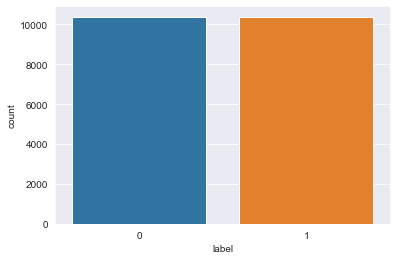

In [52]:
sns.set_style("darkgrid")
sns.countplot(clean_df.label)

In [53]:
clean_df.title.count()

20761

In [54]:
clean_df.author.value_counts()

none                                      1918
pam key                                    243
admin                                      234
jerome hudson                              166
charlie spiering                           141
                                          ... 
political ears editorial staff               1
sonnie johnson                               1
kyle spencer                                 1
yonette joseph                               1
michael de la merced and rachel abrams       1
Name: author, Length: 4142, dtype: int64

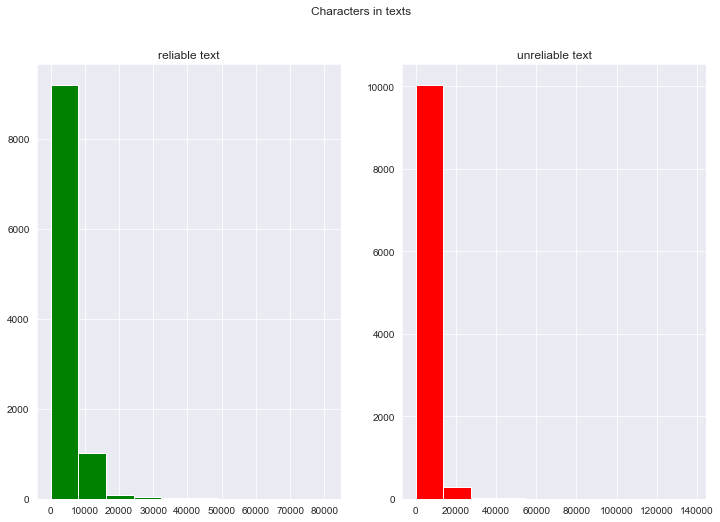

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=clean_df[clean_df['label']==0]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('reliable text')
text_len=clean_df[clean_df['label']==1]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('unreliable text')
fig.suptitle('Characters in texts')
plt.show()

In [56]:
clean_df.head()

,id,title,author,text,label
0,0,house dem aide we didn even see comey letter u...,darrell lucus,house dem aide we didn even see comey letter u...,1
1,1,flynn hillary clinton big woman on campus brei...,daniel flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews com,why the truth might get you fired october the ...,1
3,3,civilians killed in single us airstrike have b...,jessica purkiss,videos civilians killed in single us airstrike...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to s...,1


In [57]:
# Text length
clean_df["text_len"] = clean_df['text'].apply(lambda x: len(x))

In [58]:
# Identify in which cases the text length = 0
clean_df["text"] = clean_df["text"].str.strip()

clean_df["text_len"] = clean_df["text"].apply(lambda x: len(x))
print(len(clean_df[clean_df["text_len"]==0]))

79


In [59]:
clean_df.describe().round(1)

,id,label,text_len
count,20761.0,20761.0,20761.0
mean,10401.1,0.5,4299.6
std,6005.1,0.5,4850.1
min,0.0,0.0,0.0
25%,5201.0,0.0,1534.0
50%,10401.0,0.0,3181.0
75%,15603.0,1.0,5927.0
max,20799.0,1.0,137844.0


#KEINE AHNUNG, OB MACHEN ODER LASSEN?!?!?

# Restart to remove all text with length = 0

train_df = pd.read_csv("train.csv", index_col=0)
train_df = train_df[train_df['text'].notna()]
train_df.reset_index(drop=True, inplace=True)


train_df = train_df.fillna(' ')
train_df['text'] = train_df['text'].str.strip()
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))
print(len(train_df[train_df['raw_text_length']==0]))
print(train_df.isna().sum())
train_df = train_df[train_df['raw_text_length'] > 0]
print(train_df.shape)
print(train_df.isna().sum())

# Visualize the target's distribution
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()


In [60]:
from nltk import sent_tokenize
clean_df["sent_tokens"] = clean_df["text"].apply(sent_tokenize)

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [62]:

def preprocess_text(x):
  clean_df = re.sub(r'[^a-zA-Z\d\s\']+', '', x)
  word_list = []
  for each_word in clean_df.split(' '):
    try:
      word_list.append(contractions.fix(each_word).lower())
    except:
      print(x)
  return " ".join(word_list)

In [63]:
text_cols = ['text', 'title', 'author']
for col in text_cols:
  print("Processing column: {}".format(col))
  clean_df[col] = clean_df[col].apply(lambda x: clean_df)

Processing column: text
Processing column: title
Processing column: author


In [64]:
for col in text_cols:
    print("Processing column: {}".format(col))
    clean_df[col] = clean_df[col].apply(word_tokenize)
  

for col in text_cols:
    print("Processing column: {}".format(col))
    clean_df[col] = clean_df[col].apply(
        lambda x: [each_word for each_word in x if each_word not in stopwords])
    

Processing column: text


TypeError: expected string or bytes-like object

In [65]:

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(clean_df['title'])

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)


TypeError: expected string or bytes-like object

In [66]:
clean_df.head()

RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded while calling a Python object

In [67]:
# join all texts in resective labels
all_texts_gen = " ".join(df[df['label']==0]['text'])
all_texts_fake = " ".join(df[df['label']==1]['text'])

# Wordcloud for Genuine News
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_texts_gen)                       
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Worldcloud for Fake News
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_texts_fake)                    
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

NameError: name 'WordCloud' is not defined

/Users/lukasfrickelgooglemail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of the length of characters in Fake and Genuine Articles')

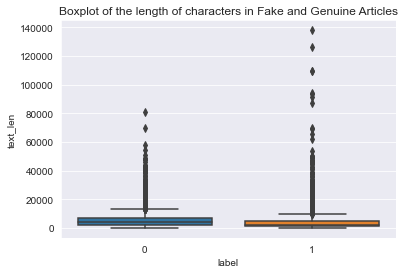

In [68]:
sns.boxplot("label", "text_len", data = clean_df)
plt.title("Boxplot of the length of characters in Fake and Genuine Articles")

/Users/lukasfrickelgooglemail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


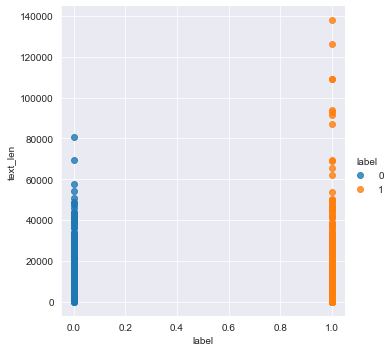

In [69]:
sns.lmplot("label","text_len", hue="label", data= clean_df)